In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt


In [34]:
# Load your CSV file
callouts = pd.read_csv("E:\MSAI\AI in Healthcare\M4\MIMIC Demo data\mimic-iii-clinical-database-demo-1.4\CALLOUT.csv")
chartevents = pd.read_csv("E:\MSAI\AI in Healthcare\M4\MIMIC Demo data\mimic-iii-clinical-database-demo-1.4\CHARTEVENTS.csv", low_memory=False)

# merged_data_1 = pd.merge(callouts, chartevents, on='subject_id')
callouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   row_id                  77 non-null     int64  
 1   subject_id              77 non-null     int64  
 2   hadm_id                 77 non-null     int64  
 3   submit_wardid           77 non-null     int64  
 4   submit_careunit         9 non-null      object 
 5   curr_wardid             77 non-null     int64  
 6   curr_careunit           77 non-null     object 
 7   callout_wardid          77 non-null     int64  
 8   callout_service         77 non-null     object 
 9   request_tele            77 non-null     int64  
 10  request_resp            77 non-null     int64  
 11  request_cdiff           77 non-null     int64  
 12  request_mrsa            77 non-null     int64  
 13  request_vre             77 non-null     int64  
 14  callout_status          77 non-null     obje

<Figure size 600x200 with 0 Axes>

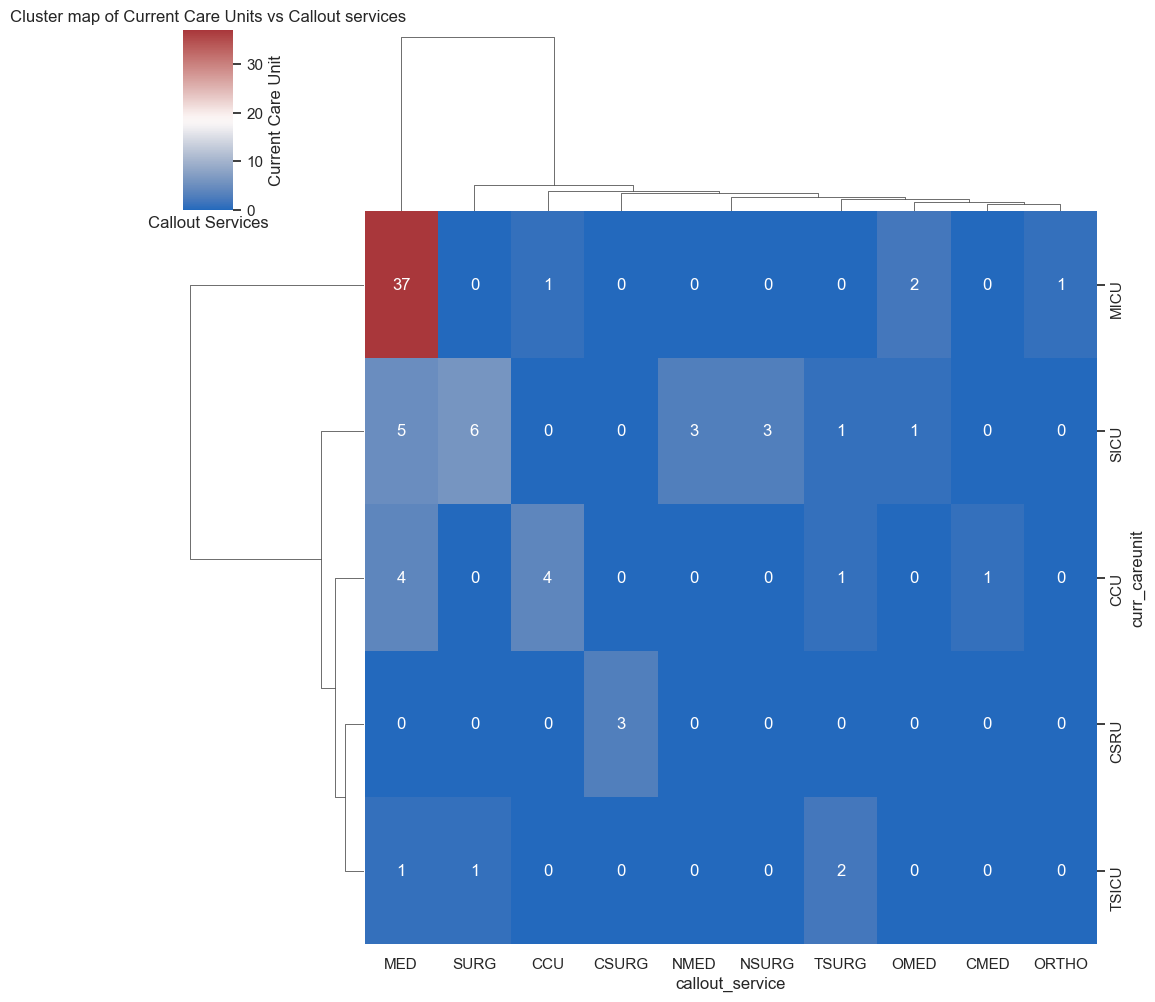

In [35]:
# Create a pivot table for clustermap
clustermap_data = pd.crosstab(callouts['curr_careunit'], callouts['callout_service'])

# Create a clustermap for current care units vs callout services 
plt.figure(figsize=(6, 2))
sns.clustermap(clustermap_data, annot=True, fmt='d', cmap='vlag')
plt.title('Cluster map of Current Care Units vs Callout services')
plt.xlabel('Callout Services')
plt.ylabel('Current Care Unit')
plt.show()

C:\Users\owais\AppData\Local\Temp\ipykernel_26564\3772093182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chartevents_mmhg['charttime'] = pd.to_datetime(chartevents_mmhg['charttime'])
C:\Users\owais\AppData\Local\Temp\ipykernel_26564\3772093182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chartevents_mmhg['charttime-year'] = chartevents_mmhg['charttime'].dt.year


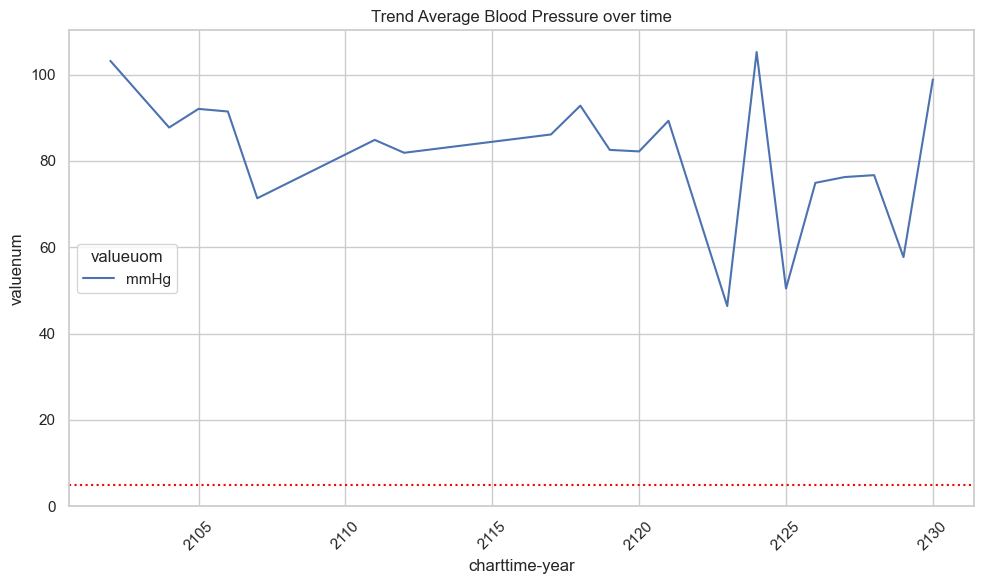

In [40]:

# Filter for mmHg values

chartevents_mmhg = chartevents[chartevents['subject_id'] == 40124]
chartevents_mmhg = chartevents[chartevents['valueuom'] == 'mmHg']
#convert charttime to year format
chartevents_mmhg['charttime'] = pd.to_datetime(chartevents_mmhg['charttime'])
chartevents_mmhg['charttime-year'] = chartevents_mmhg['charttime'].dt.year

chartevents_s = chartevents_mmhg.groupby(['valueuom', 'charttime-year'])['valuenum'].mean().reset_index().head(20)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(data=chartevents_s, x='charttime-year', y='valuenum', hue='valueuom')
threshold = 5  # Set your threshold value here
plt.axhline(y=threshold, color='red', linestyle='dotted', label=f'Threshold ({threshold})')
plt.title('Trend Average Blood Pressure over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



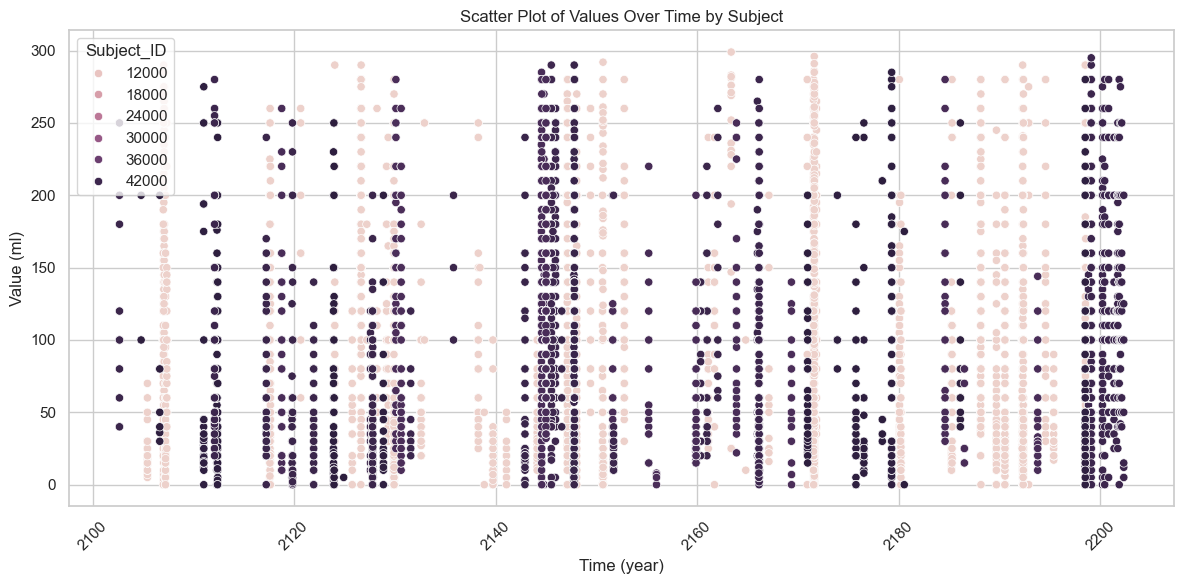

In [82]:
chartevents = pd.read_csv("E:\MSAI\AI in Healthcare\M4\MIMIC Demo data\mimic-iii-clinical-database-demo-1.4\OUTPUTEVENTS.csv")

# convert 'charttime' into a datetime object
chartevents['charttime'] = pd.to_datetime(chartevents['charttime']) 
chartevents_filtered = df[df['value'] < 300]

# Create a scatter plot for values of values of sample collected for subjects over time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=chartevents_filtered, x='charttime', y='value', hue='subject_id', markers='o')
plt.title('Scatter Plot of Values Over Time by Subject')
plt.xlabel('Time (year)')
plt.ylabel('Value (ml)')
plt.legend(title='Subject_ID')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



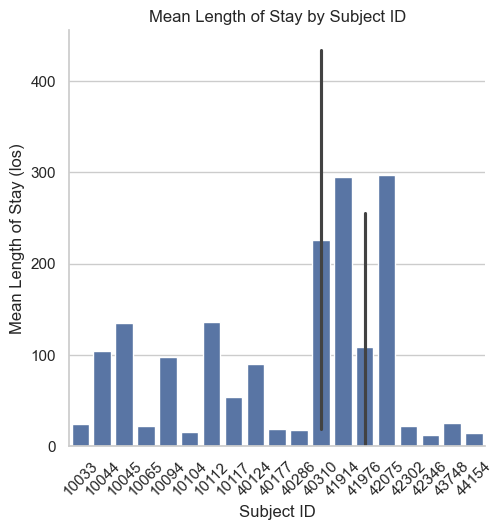

In [37]:

transfer= pd.read_csv("E:\MSAI\AI in Healthcare\M4\MIMIC Demo data\mimic-iii-clinical-database-demo-1.4\TRANSFERS.csv")

transfer = pd.DataFrame(transfer)

# Drop NaN values
transfer.dropna(inplace=True)

# Create a catplot to show mean LOS by subject_id
sns.catplot(x='subject_id', y='los', data=transfer, kind='bar', estimator='mean')
plt.xlabel('Subject ID')
plt.ylabel('Mean Length of Stay (los)')
plt.title('Mean Length of Stay by Subject ID')
plt.xticks(rotation=45)
plt.show()


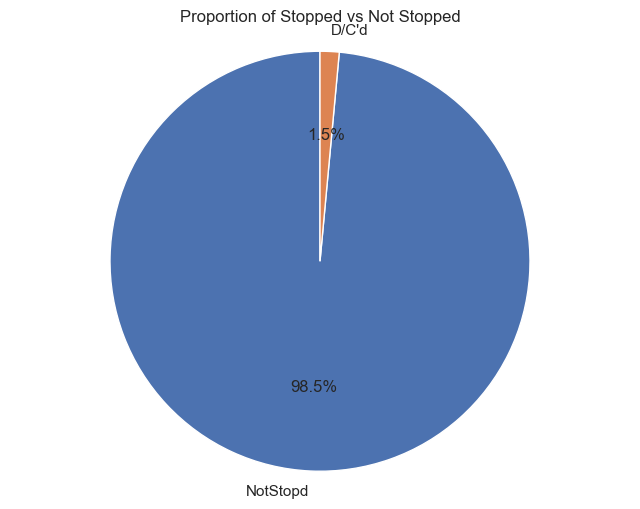

In [32]:
df = pd.read_csv("E:\MSAI\AI in Healthcare\M4\MIMIC Demo data\mimic-iii-clinical-database-demo-1.4\DATETIMEEVENTS.csv")
# Create a DataFrame
df = pd.DataFrame(df)

# Count the occurrences of each status
status_counts = df['stopped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Stopped vs Not Stopped')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

